In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
def harmonic_oscillator(x, y, E):
    return [y[1], (K * x**2 - E) * y[0]]

In [ ]:
K = 1
E = 1
L = 2
x_span = [-L, L]
y0 = [1, np.sqrt(K * L**2 - 1)]  # Initial conditions

tao = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
methods = ['RK45', 'RK23', 'Radau', 'BDF']

A9:
 [5.24466756177217, 3.019099529504504, 4.038199269261614, 6.457512609631293]


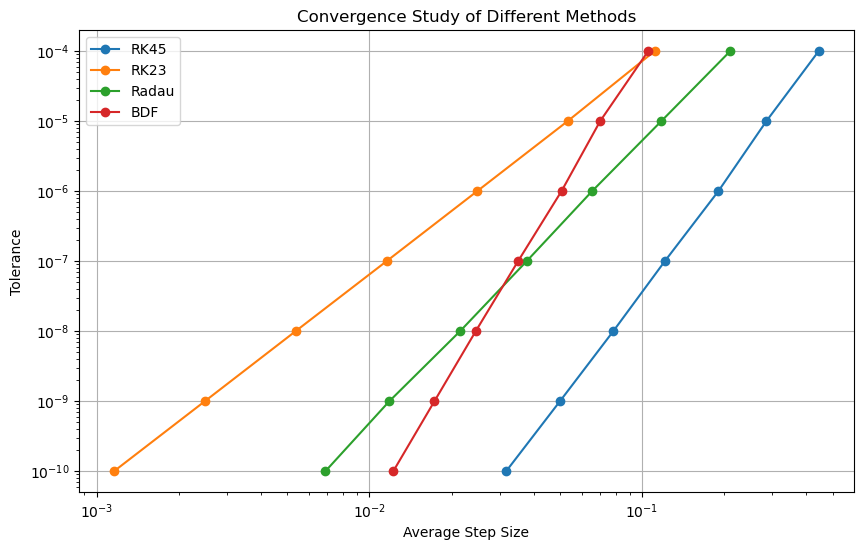

In [1]:

dx = {method: [] for method in methods}
esp = {method: [] for method in methods}

for method in methods:
    for tol in tao:
        option = {'rtol': tol, 'atol': tol}
        sol = solve_ivp(harmonic_oscillator, x_span, y0, method=method, args=(E,), **option)
        
        step_sizes = np.diff(sol.t)
        avg_step_size = np.mean(step_sizes)
        dx[method].append(avg_step_size)

        errors = np.diff(sol.y[0])
        local_error = np.mean(np.abs(errors))
        esp[method].append(local_error)

Slope = []
for method in methods:
    slope, _ = np.polyfit(np.log(dx[method]), np.log(tao), 1)
    Slope.append(float(slope))

A9 = Slope

print("A9:\n", A9)

In [ ]:
# plot for part (d)

plt.figure(figsize=(10, 6))
for method in methods:
    plt.loglog(dx[method], tao, label=method, marker='o')

plt.ylabel("Tolerance")
plt.xlabel("Average Step Size dx")
plt.legend()
plt.title("Convergence Study of Different Methods")
plt.grid(True)
plt.show()
